<a href="https://colab.research.google.com/github/w95wayne10/computer_vision/blob/master/summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from mask import J, K, octogonal_kernel, N, LoG_mtx, DoG_mtx
from cv_method import grouping, group_marking, \
                      Dilation, Erosion, Opening, Closing, \
                      Yokoi_connectivity_number, \
                      gray_level_value_count_chart, gray_hist_equalization, \
                      thinning, gaussian_noise, salt_pepper_noise, \
                      BoxFilter, MedianFilter, \
                      Robert_Operator, Prewitt_Edge_Detector, Sobel_Operator, \
                      FreiChen_Gradient_Operator, Kirsch_Compass_Operator, \
                      Robinson_Compass_Operator, Nevatia_Babu_5x5_operator, \
                      Laplace_Mask1, Laplace_Mask2, Minimum_variance_Laplacian,\
                      Laplacian_of_Gaussian, Difference_of_Gaussian, zero_crossing

from google.colab.patches import cv2_imshow

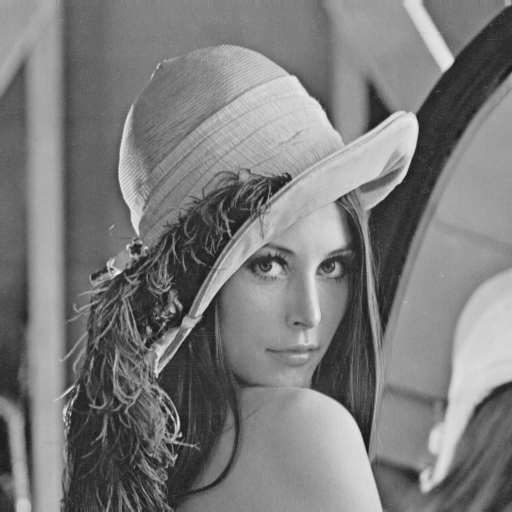

In [2]:
# 讀檔
lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
cv2_imshow(lena_gray)

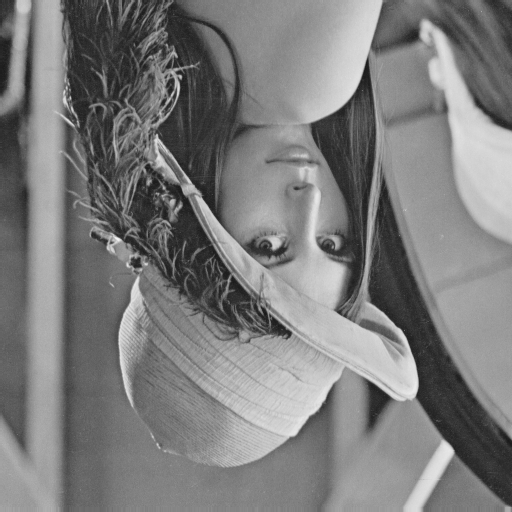

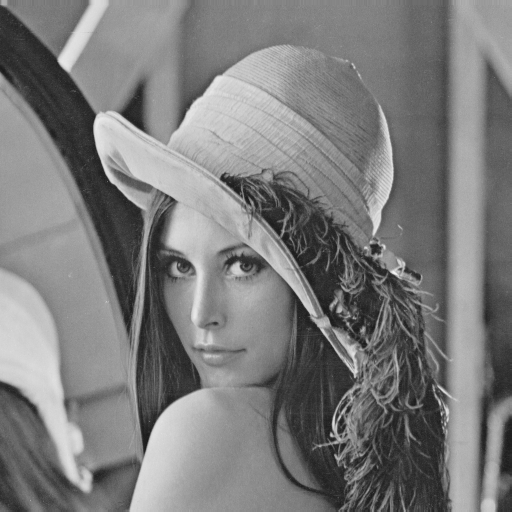

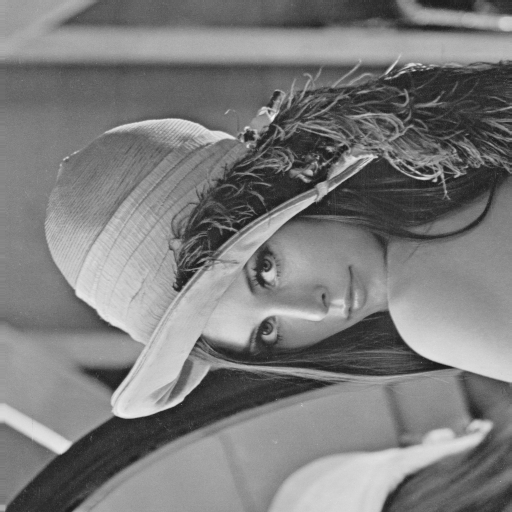

In [3]:
# 變更順序達到旋轉鏡射等效果
upside_down_lena = lena_gray[::-1, :]
rightside_left_lena = lena_gray[:, ::-1]
diagonally_flip_lena = lena_gray.T

cv2_imshow(upside_down_lena)
cv2_imshow(rightside_left_lena)
cv2_imshow(diagonally_flip_lena)
#cv2.imwrite('upside_down_lena.bmp', upside_down_lena)
#cv2.imwrite('rightside_left_lena.bmp', rightside_left_lena)
#cv2.imwrite('diagonally_flip_lena.bmp', diagonally_flip_lena)

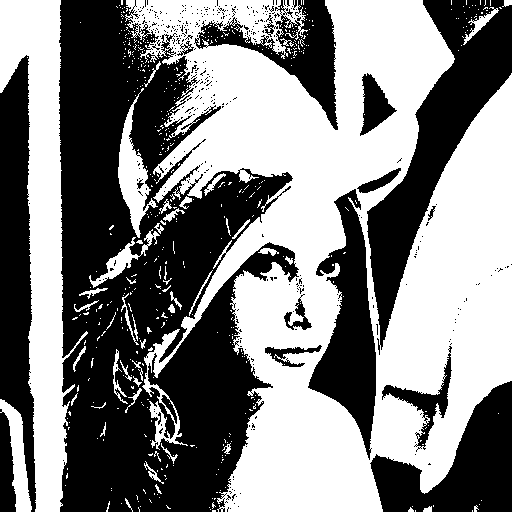

In [4]:
# 二元化
binarize_lena = lena_gray//128*255
cv2_imshow(binarize_lena)
#cv2.imwrite('binarize_lena.bmp', binarize_lena)

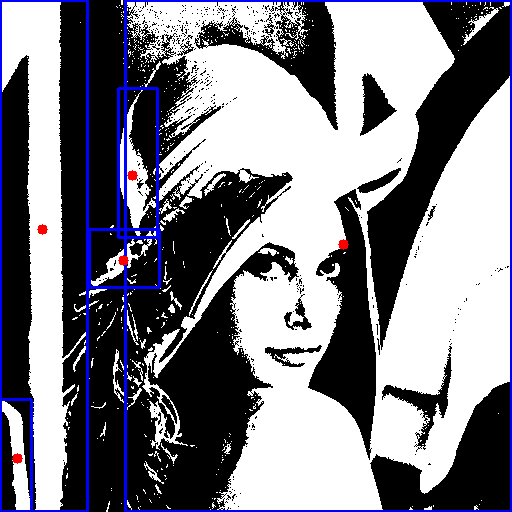

In [5]:
# 分群
# 1. 分析
IDlist = grouping(binarize_lena)
# 2. 圖上標記

cv2_imshow(group_marking(binarize_lena, IDlist))
# cv2.imwrite('group_of_lena.bmp', image)

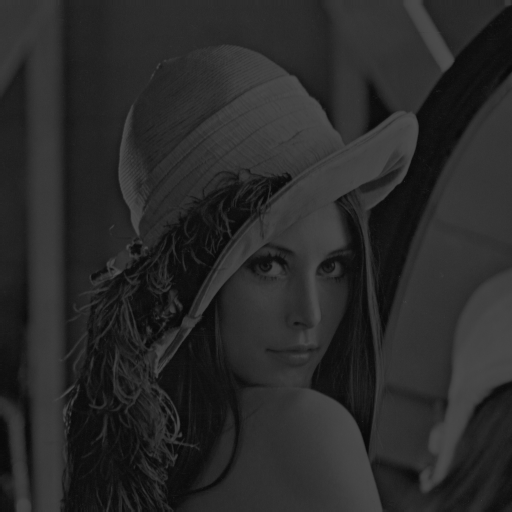

In [6]:
divid_3_lena_gray = np.uint8(np.rint(lena_gray/3))

cv2_imshow(divid_3_lena_gray)
#cv2.imwrite('divid_3_lena_gray.bmp', divid_3_lena_gray)

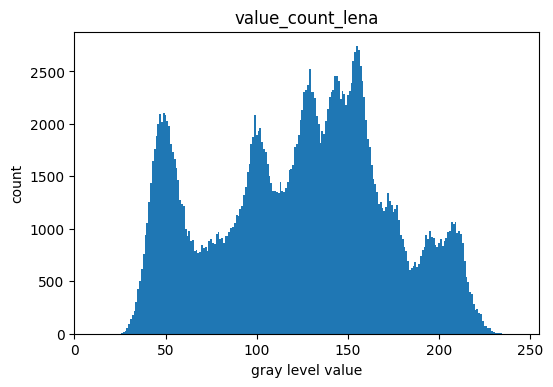

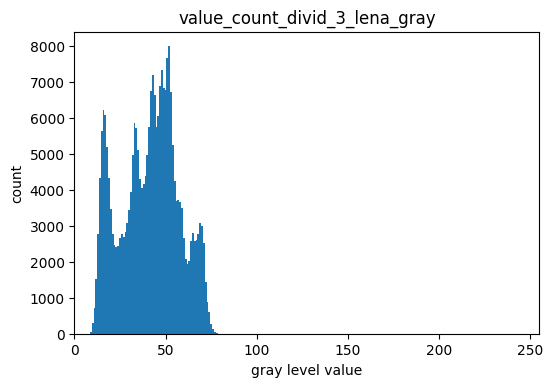

In [7]:
# 灰階圖的色階統計
gray_level_value_count_chart(lena_gray, 'value_count_lena.png')
gray_level_value_count_chart(divid_3_lena_gray, 'value_count_divid_3_lena_gray.png')

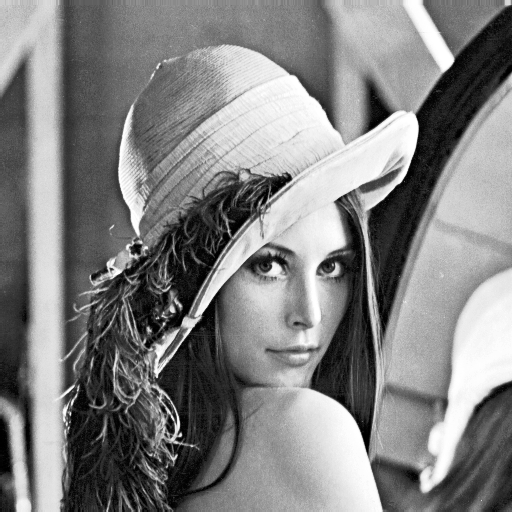

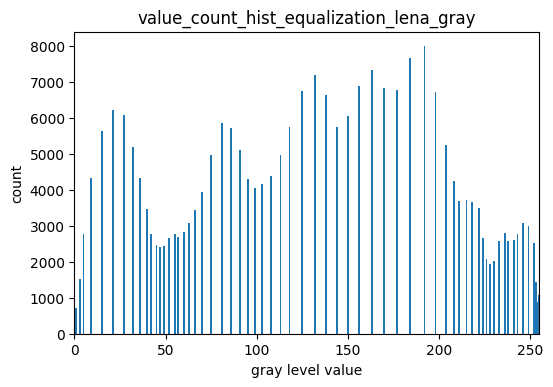

In [8]:
hist_equalization_lena_gray = gray_hist_equalization(divid_3_lena_gray)
cv2_imshow(hist_equalization_lena_gray)
#cv2.imwrite('hist_equalization_lena_gray.bmp', hist_equalization_lena_gray)
gray_level_value_count_chart(hist_equalization_lena_gray, 'value_count_hist_equalization_lena_gray.png')

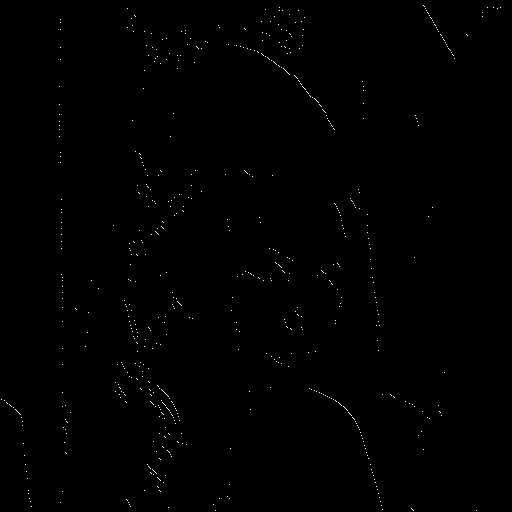

In [9]:
JErosion = Erosion(binarize_lena, J)
KErosion = Erosion(255-binarize_lena, K)
HitandMiss_binarize_lena = ((JErosion > 128)&(KErosion > 128))*255

cv2_imshow(HitandMiss_binarize_lena)
#cv2.imwrite('HitandMiss_binarize_lena.bmp', HitandMiss_binarize_lena)

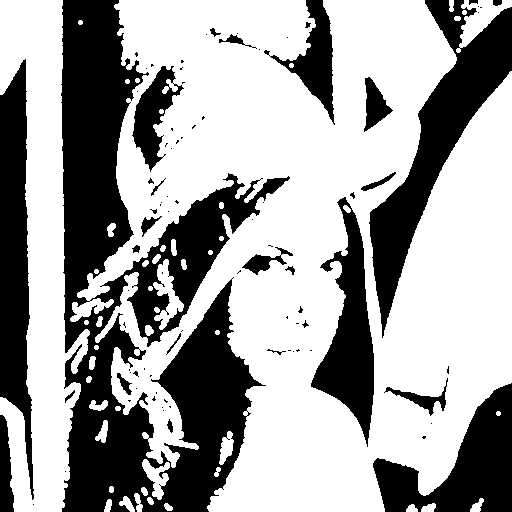

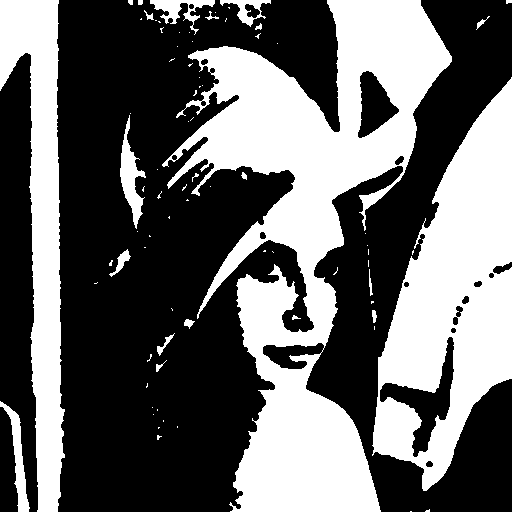

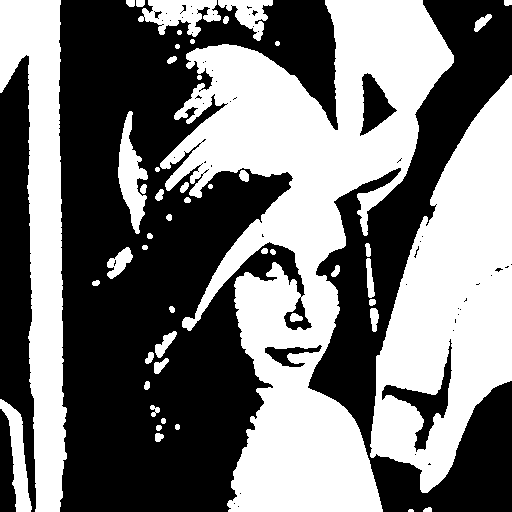

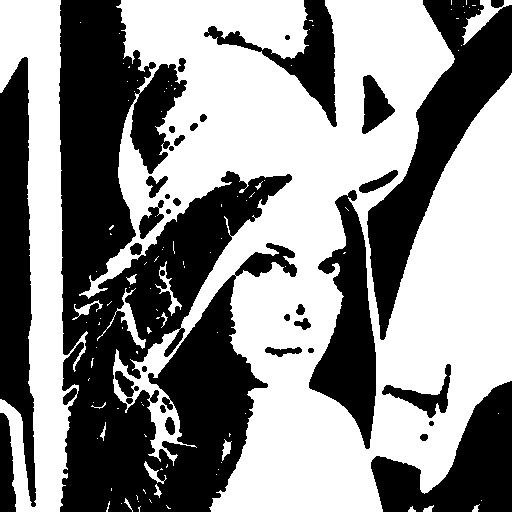

In [10]:
Dilation_binarize_lena = Dilation(binarize_lena, octogonal_kernel)
Erosion_binarize_lena = Erosion(binarize_lena, octogonal_kernel)
Opening_binarize_lena = Dilation(Erosion_binarize_lena, octogonal_kernel)
Closing_binarize_lena = Erosion(Dilation_binarize_lena, octogonal_kernel)

cv2_imshow(Dilation_binarize_lena)
cv2_imshow(Erosion_binarize_lena)
cv2_imshow(Opening_binarize_lena)
cv2_imshow(Closing_binarize_lena)
#cv2.imwrite('Dilation_binarize_lena.bmp', Dilation_binarize_lena)
#cv2.imwrite('Erosion_binarize_lena.bmp', Erosion_binarize_lena)
#cv2.imwrite('Opening_binarize_lena.bmp', Opening_binarize_lena)
#cv2.imwrite('Closing_binarize_lena.bmp', Closing_binarize_lena)

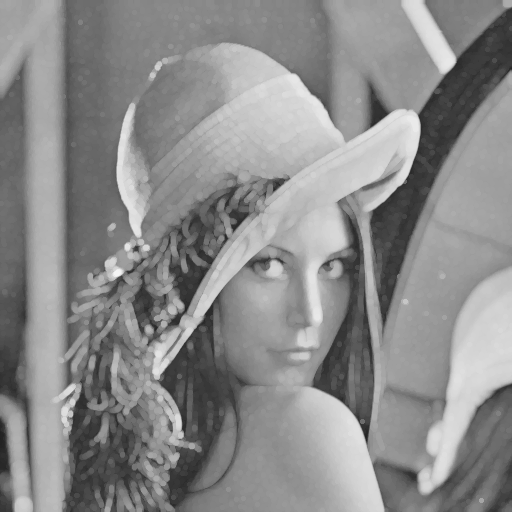

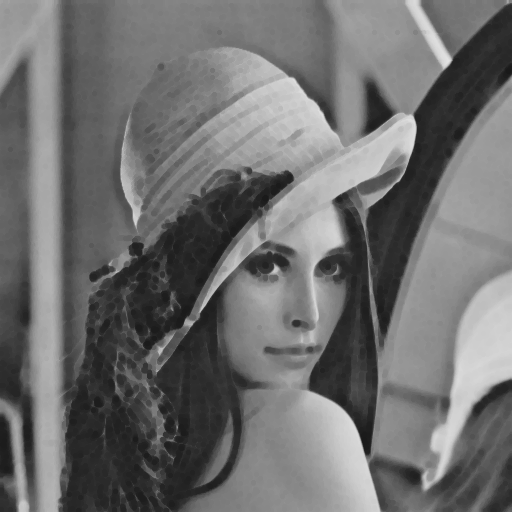

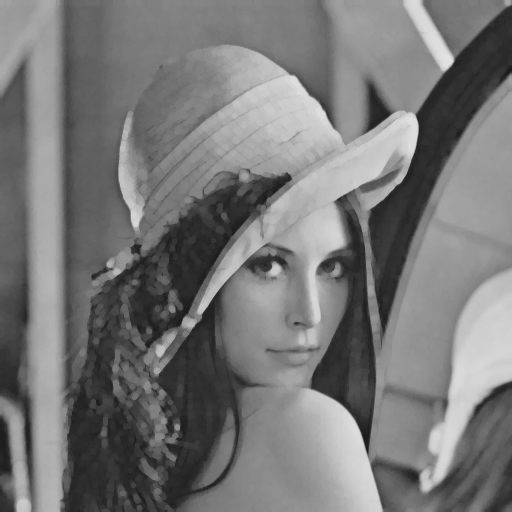

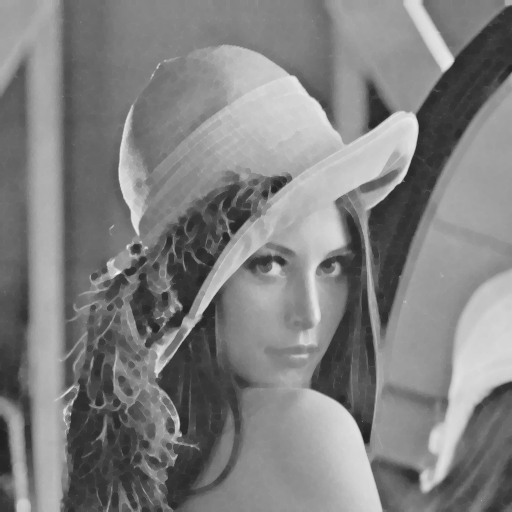

In [11]:
Dilation_lena = Dilation(lena_gray, octogonal_kernel)
Erosion_lena = Erosion(lena_gray, octogonal_kernel)
Opening_lena = Dilation(Erosion_lena, octogonal_kernel)
Closing_lena = Erosion(Dilation_lena, octogonal_kernel)


cv2_imshow(Dilation_lena)
cv2_imshow(Erosion_lena)
cv2_imshow(Opening_lena)
cv2_imshow(Closing_lena)
#cv2.imwrite('Dilation_lena.bmp', Dilation_lena)
#cv2.imwrite('Erosion_lena.bmp', Erosion_lena)
#cv2.imwrite('Opening_lena.bmp', Opening_lena)
#cv2.imwrite('Closing_lena.bmp', Closing_lena)

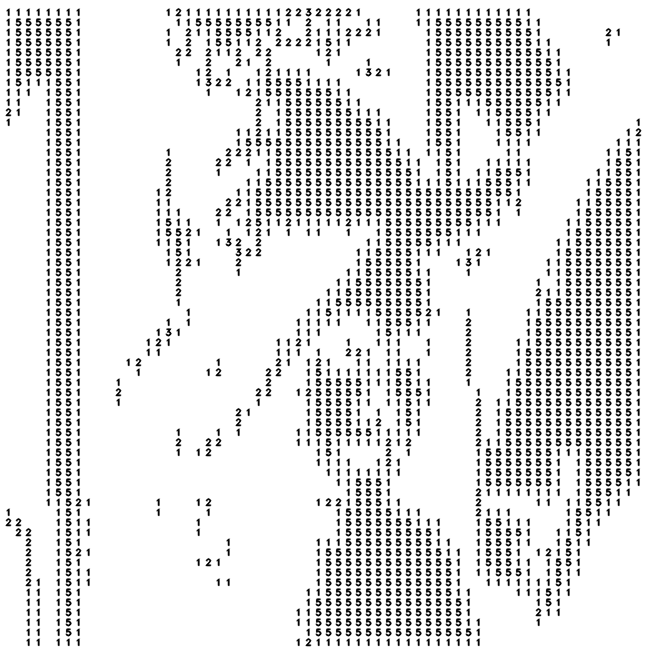

In [12]:
cv2_imshow(Yokoi_connectivity_number(binarize_lena))
# cv2.imwrite('img.bmp', Yokoi_connectivity_number(binarize_lena))

In [13]:
np.array([[1,2,3],[4,5,6],[7,8,9]])[1:-1,1:-1]

array([[5]])

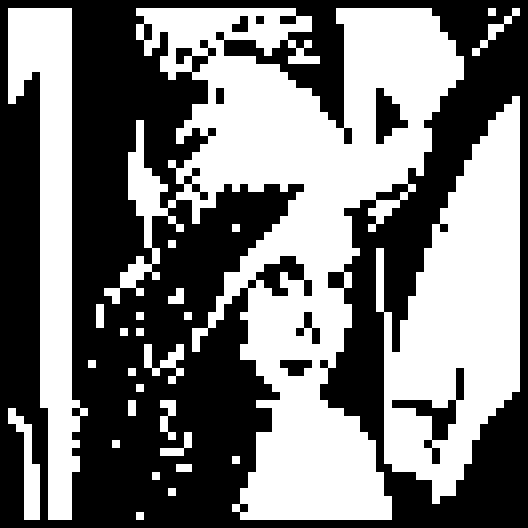

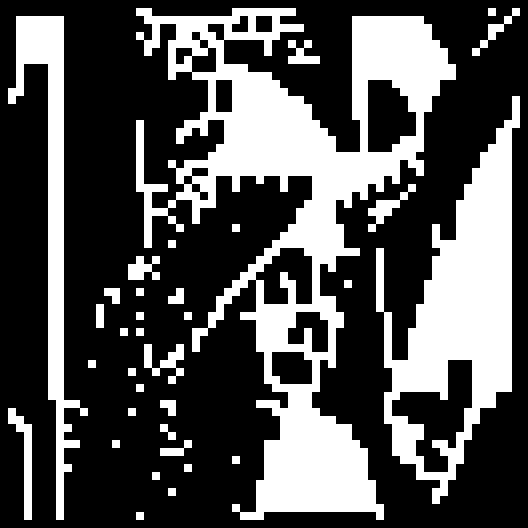

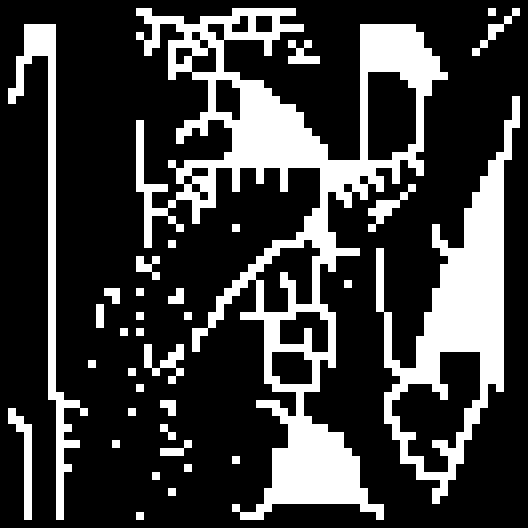

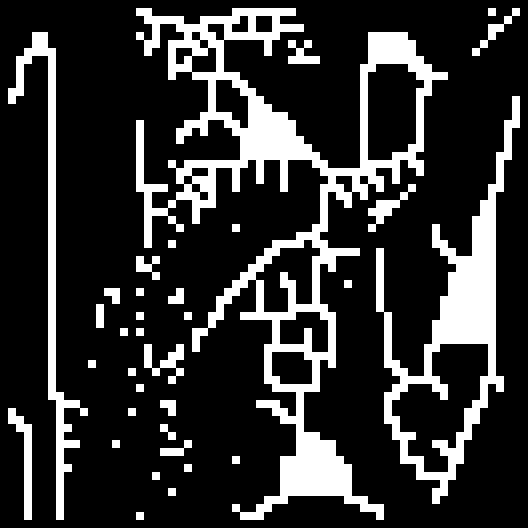

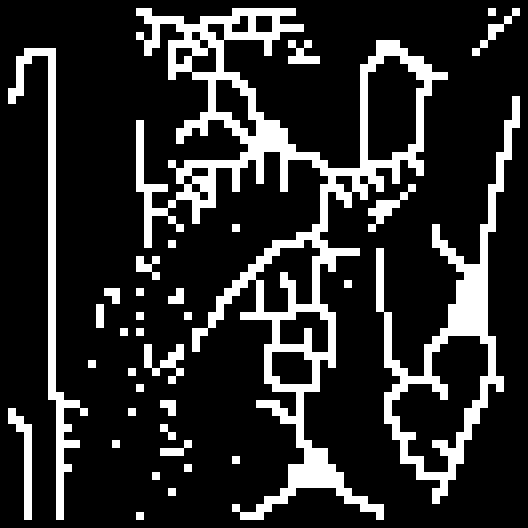

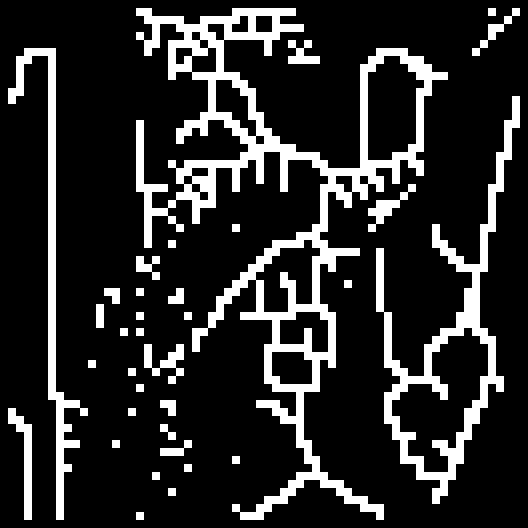

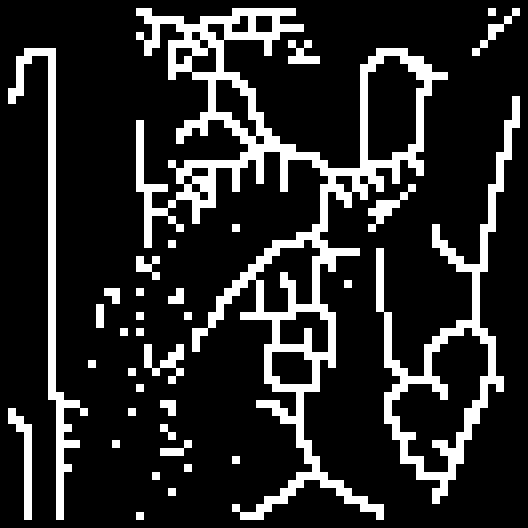

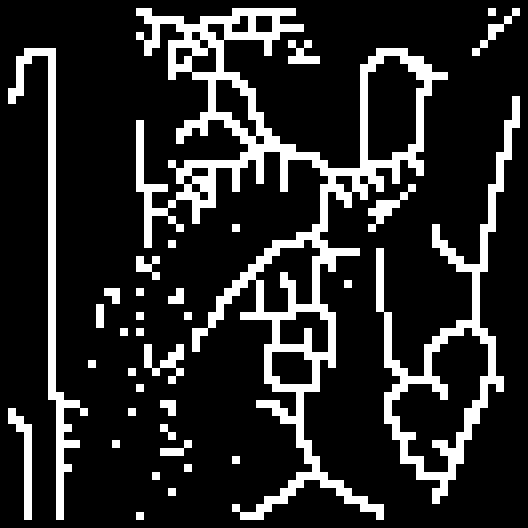

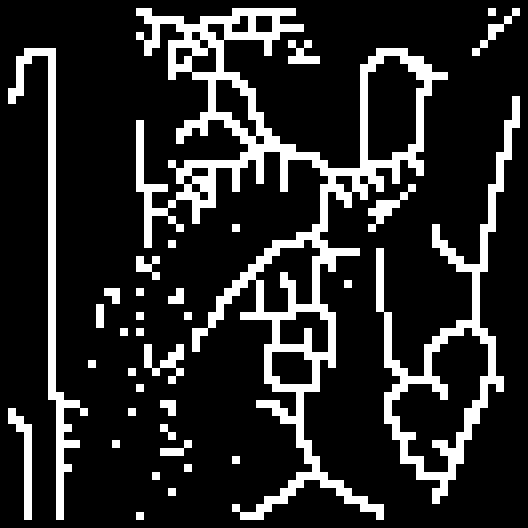

In [14]:
cv2_imshow(cv2.resize(thinning(binarize_lena), (512+16,512+16), interpolation = cv2.INTER_AREA))
#cv2.imwrite('new_lena.bmp', cv2.resize(thinning(binarize_lena), (512,512), interpolation = cv2.INTER_AREA))

Gnoise10, SNR=-7.989853520781547


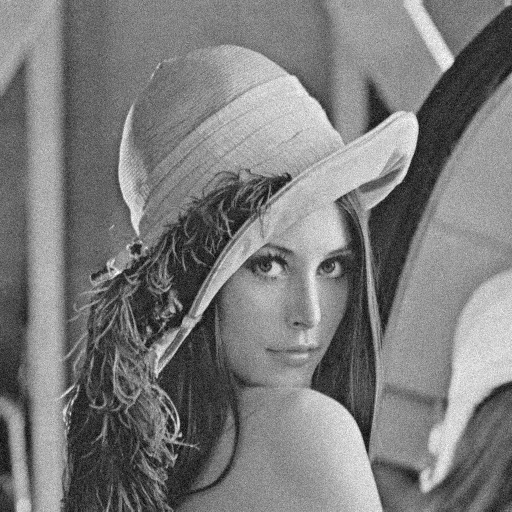

Gnoise30, SNR=-6.889491543396183


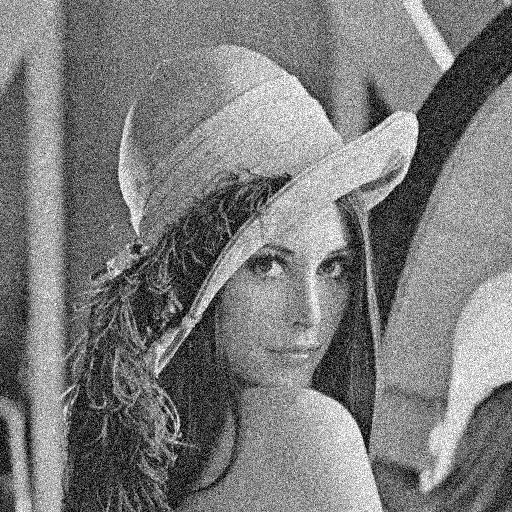

SPnoise005, SNR=1.05959187855303


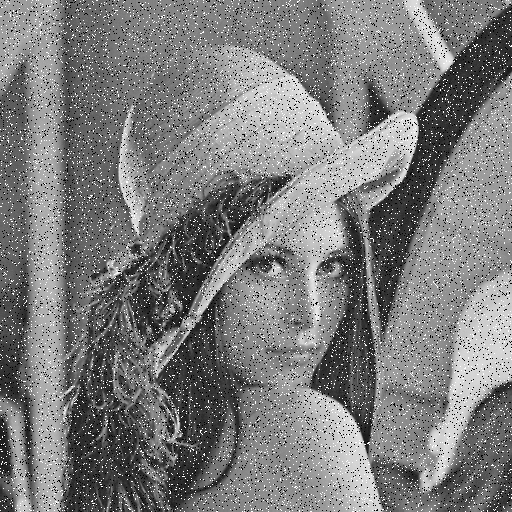

SPnoise010, SNR=-1.4973042278324864


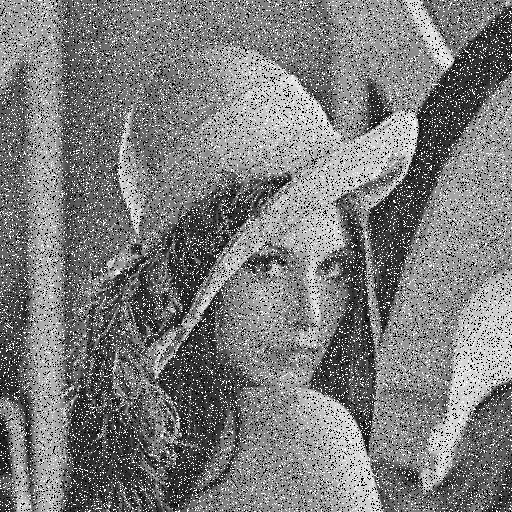

Gnoise10_Box3x3, SNR=17.744793037755965


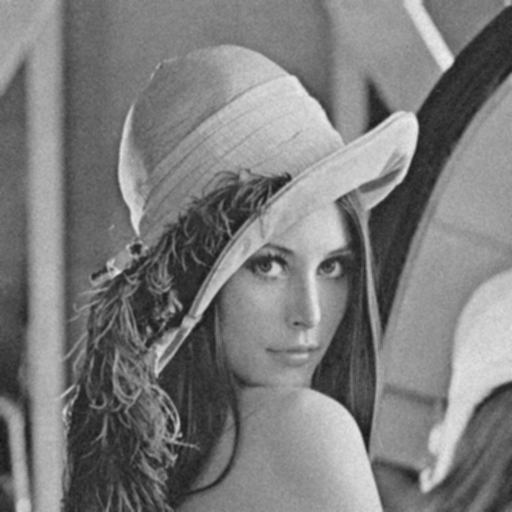

Gnoise10_Box5x5, SNR=14.869046223353525


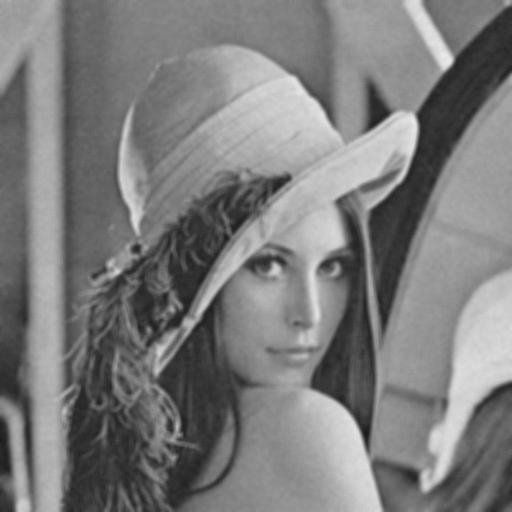

Gnoise10_Median3x3, SNR=17.665881938520066


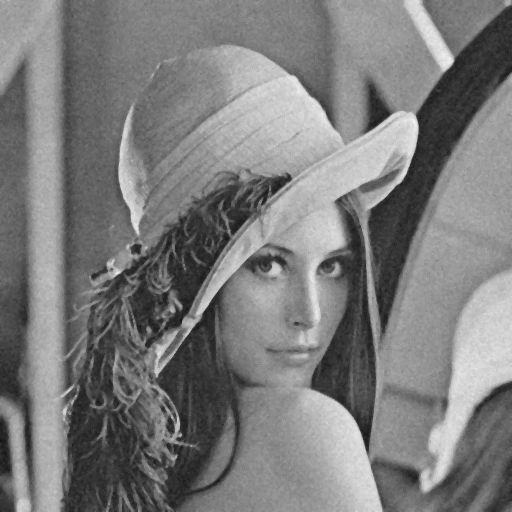

Gnoise10_Median5x5, SNR=16.00707844620744


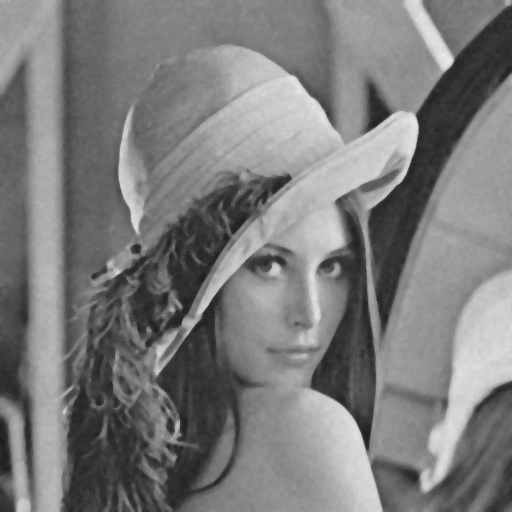

Gnoise10_OthenC, SNR=13.269084651124484


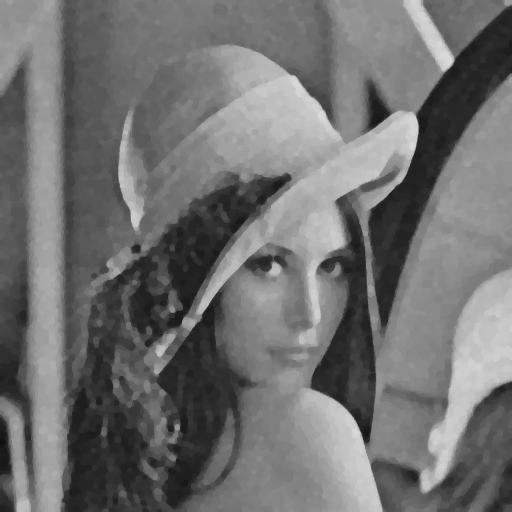

Gnoise10_CthenO, SNR=13.609249548874825


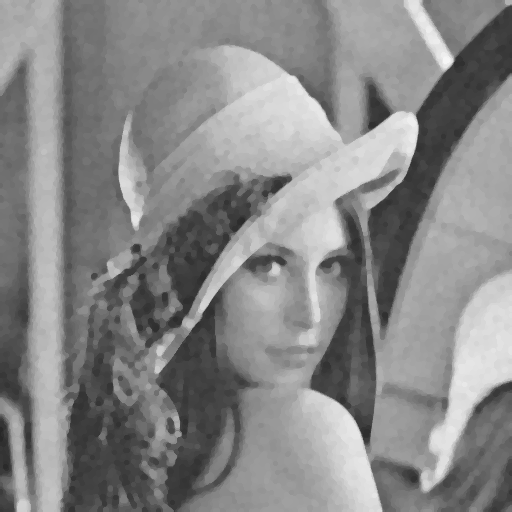

Gnoise30_Box3x3, SNR=12.592973965156789


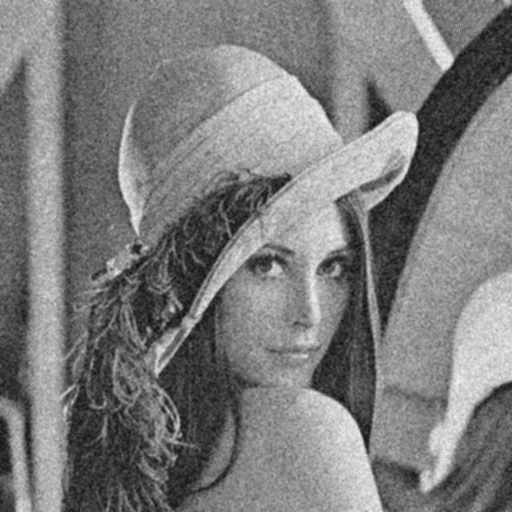

Gnoise30_Box5x5, SNR=13.297636507581066


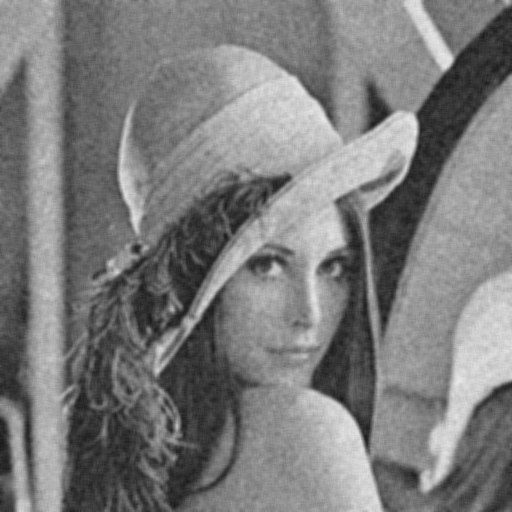

Gnoise30_Median3x3, SNR=11.08558355623976


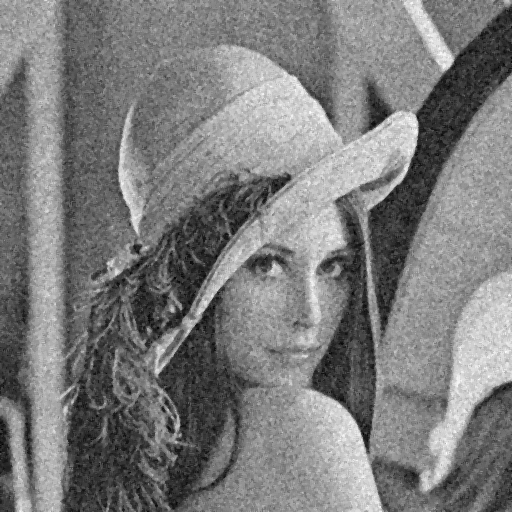

Gnoise30_Median5x5, SNR=12.901624771779684


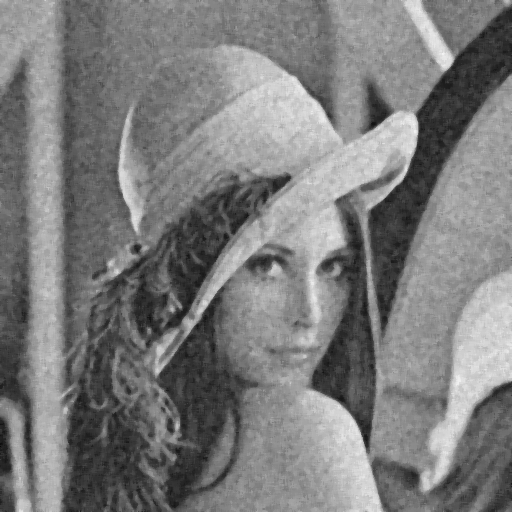

Gnoise30_OthenC, SNR=11.204595810817928


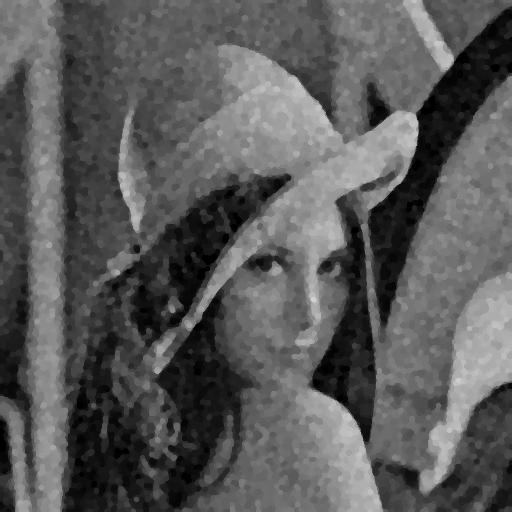

Gnoise30_CthenO, SNR=11.186361317176912


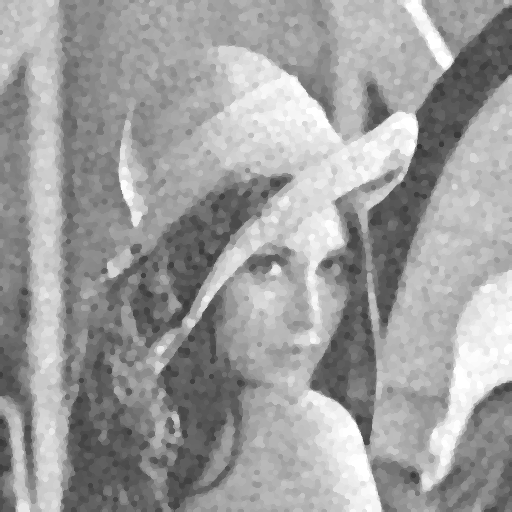

SPnoise005_Box3x3, SNR=9.371429885121414


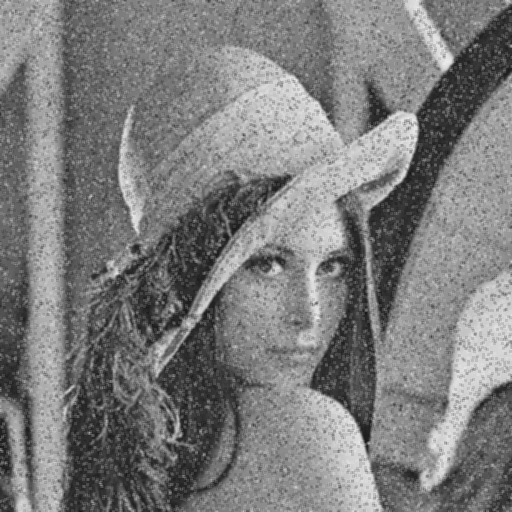

SPnoise005_Box5x5, SNR=11.087010531253283


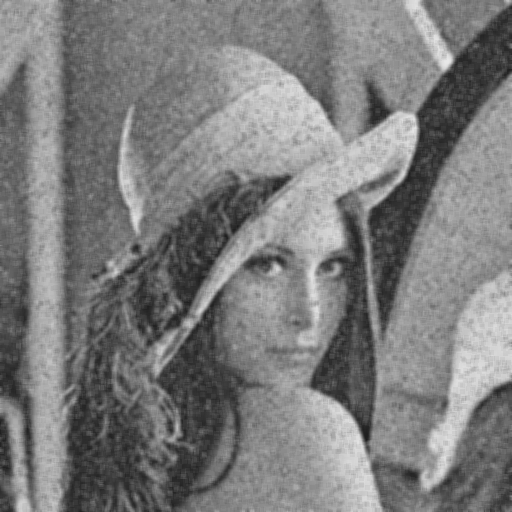

SPnoise005_Median3x3, SNR=19.06744138099286


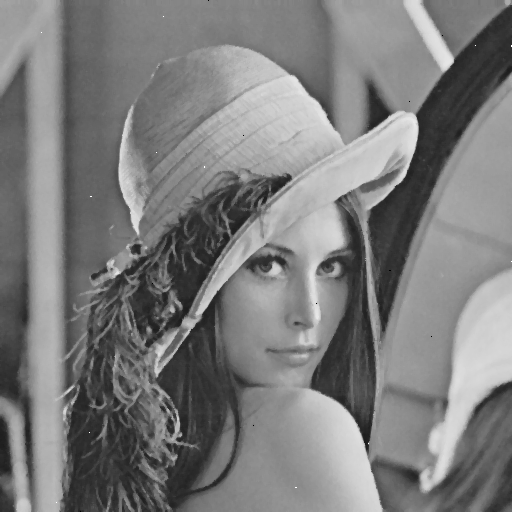

SPnoise005_Median5x5, SNR=16.383139728085894


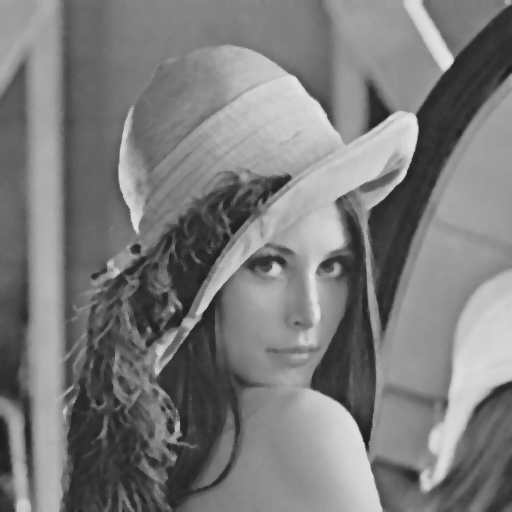

SPnoise005_OthenC, SNR=5.34704390483907


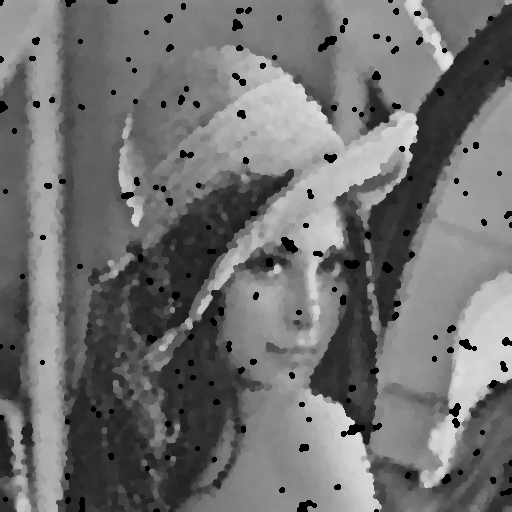

SPnoise005_CthenO, SNR=5.607540386379104


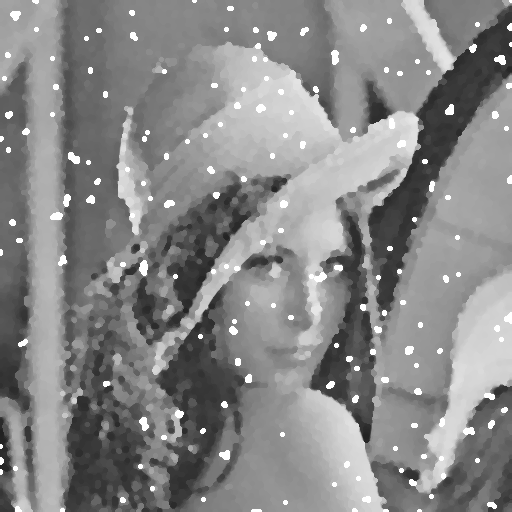

SPnoise010_Box3x3, SNR=6.305818027568684


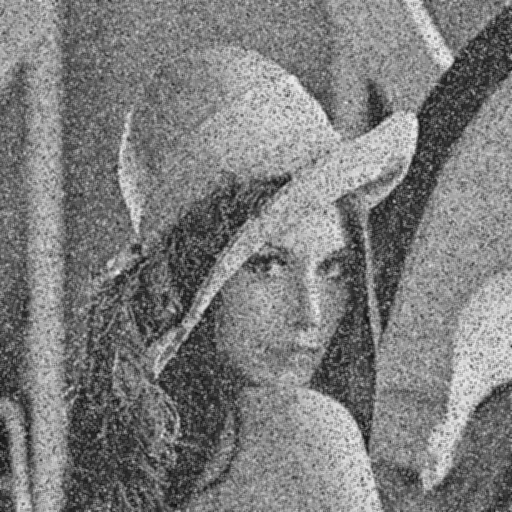

SPnoise010_Box5x5, SNR=8.477254174002915


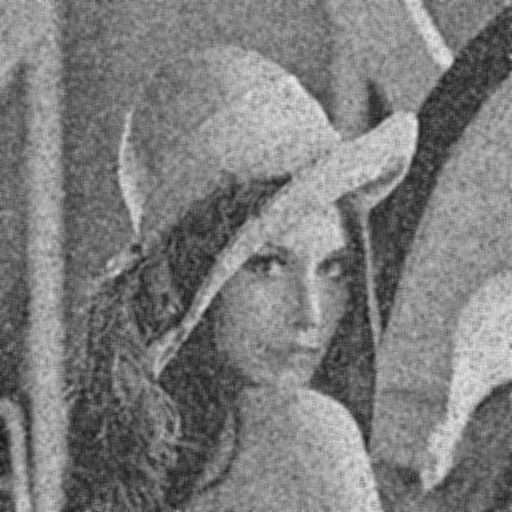

SPnoise010_Median3x3, SNR=14.836572853644515


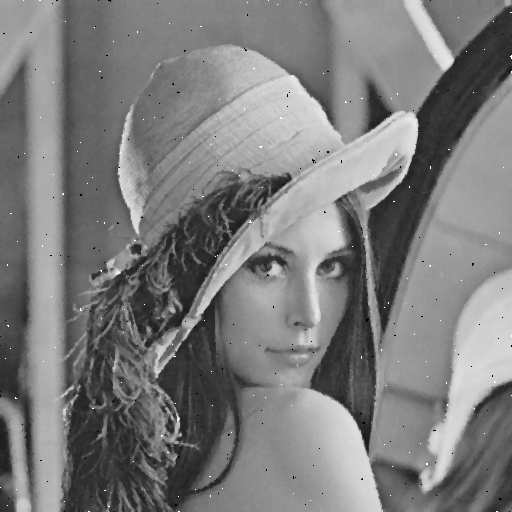

SPnoise010_Median5x5, SNR=15.74221363952027


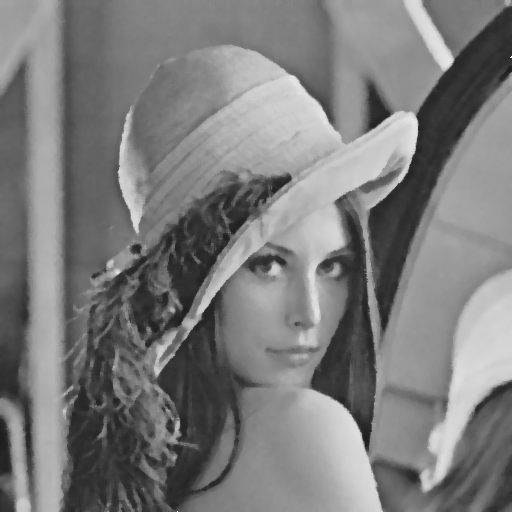

SPnoise010_OthenC, SNR=-2.2739744932207233


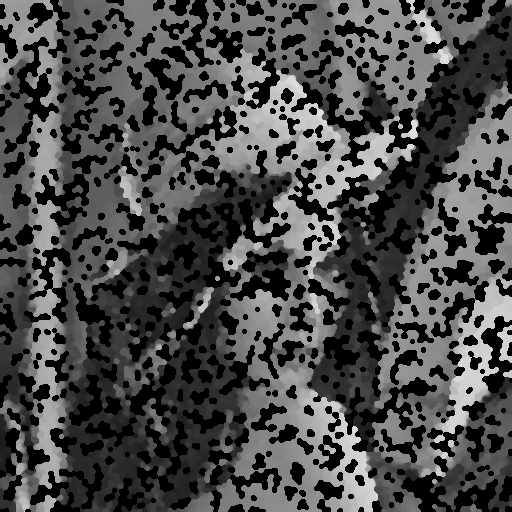

SPnoise010_CthenO, SNR=-2.654724054304061


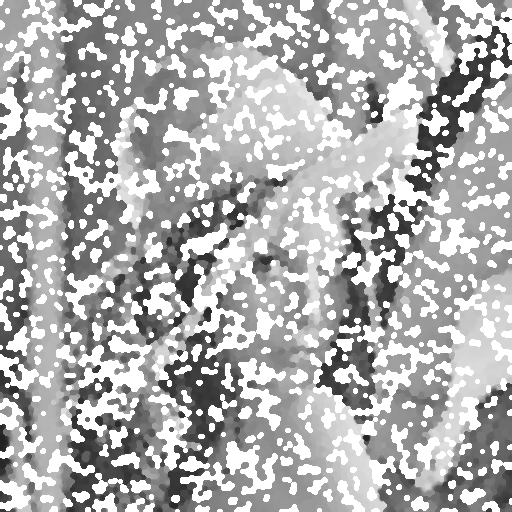

In [15]:
N = lena_gray.shape[0]*lena_gray.shape[1]
mu_s = np.sum(lena_gray)/N
VS = np.sum((lena_gray-mu_s)**2)/N

noise_img_dict = {}
noise_img_dict["Gnoise10"] = np.uint8(gaussian_noise(lena_gray, 10))
noise_img_dict["Gnoise30"] = np.uint8(gaussian_noise(lena_gray, 30))
noise_img_dict["SPnoise005"] = salt_pepper_noise(lena_gray, 0.05)
noise_img_dict["SPnoise010"] = salt_pepper_noise(lena_gray, 0.1)

for NIname, img in noise_img_dict.items():
  mu_n = np.sum(img-lena_gray)/N
  VN = np.sum((img-lena_gray-mu_n)**2)/N
  SNR = 20*np.log10(np.sqrt(VS)/np.sqrt(VN))
  print(NIname+", SNR="+str(SNR))
  cv2_imshow(img)
  #cv2.imwrite(NIname+".bmp", img)

for NIname, img in noise_img_dict.items():
  for method in ["Box", "Median", "OandC"]:
    for case in range(2):
      if method in ["Box", "Median"]:
        size = 3 if case == 0 else 5
        result = BoxFilter(img, size) if method=="Box" else MedianFilter(img, size)
        Rname = NIname+"_"+method+str(size)+"x"+str(size)
      else:
        methodName = "OthenC" if case==0 else "CthenO"
        result = Closing(Opening(img, octogonal_kernel), octogonal_kernel) if case==0 else Opening(Closing(img, octogonal_kernel), octogonal_kernel)
        Rname = NIname+"_"+methodName
      mu_n = np.sum(result-lena_gray)/N
      VN = np.sum((result-lena_gray-mu_n)**2)/N
      SNR = 20*np.log10(np.sqrt(VS)/np.sqrt(VN))
      print(Rname+", SNR="+str(SNR))
      cv2_imshow(result)
      #cv2.imwrite(Rname+".bmp",result)

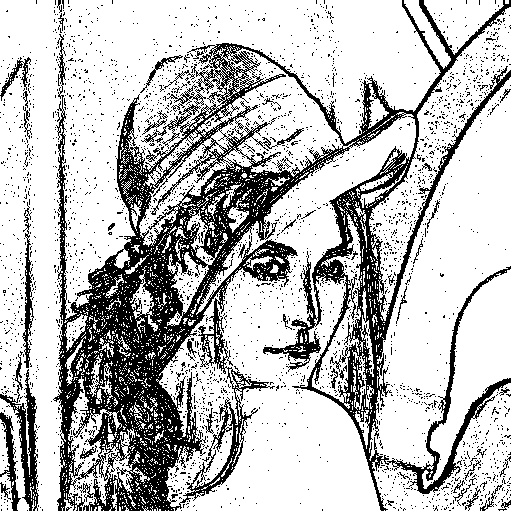

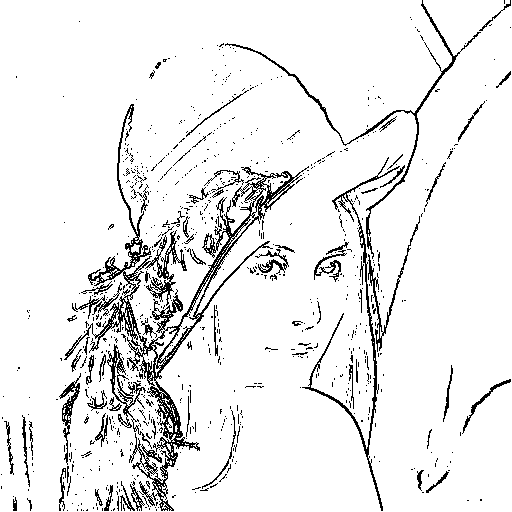

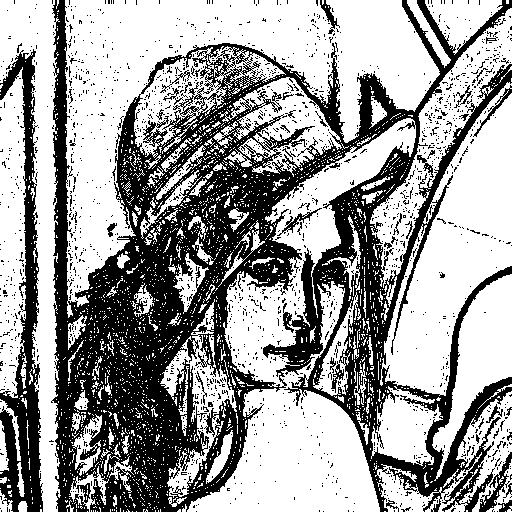

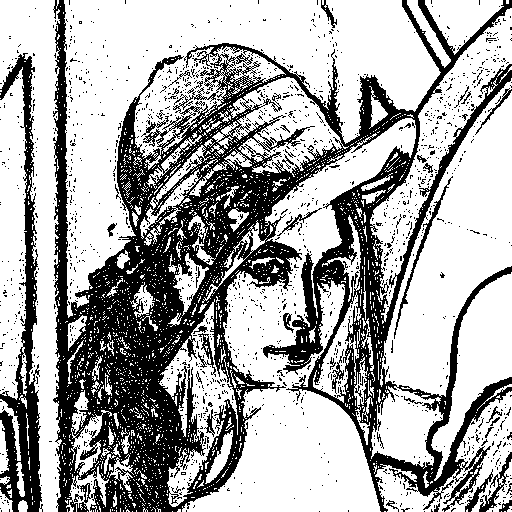

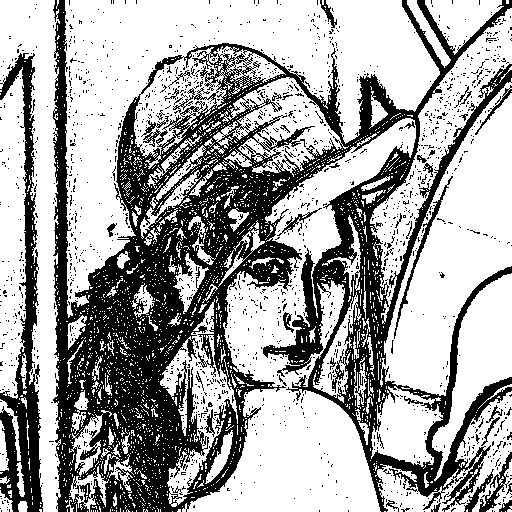

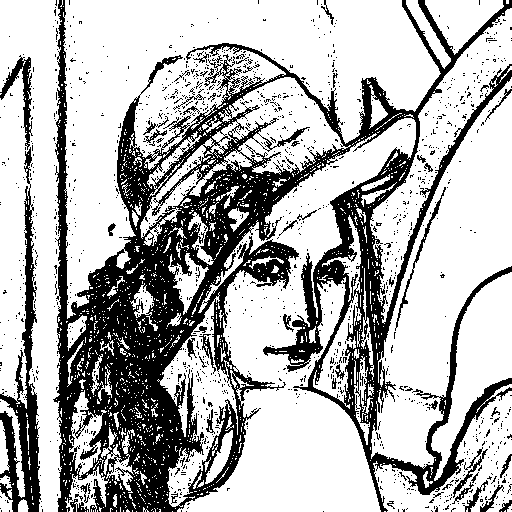

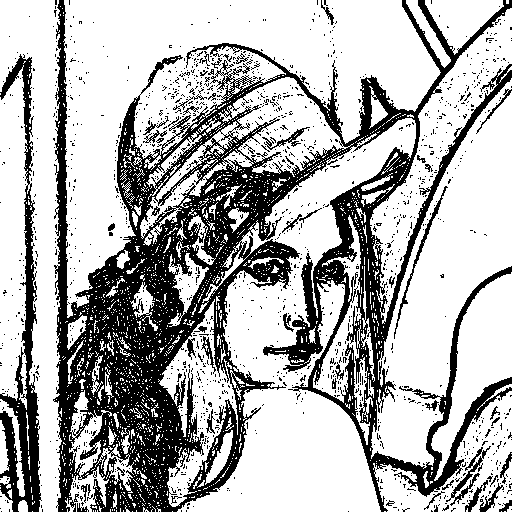

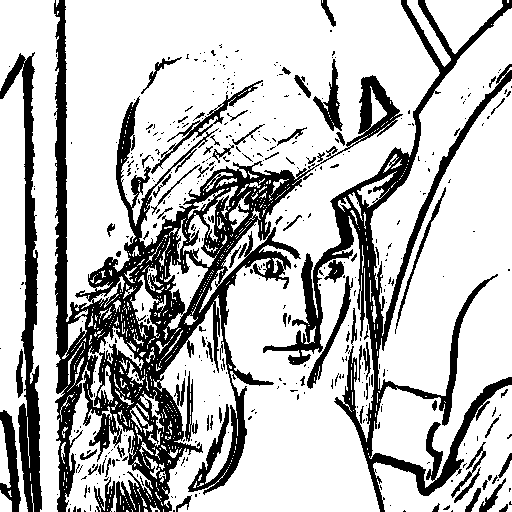

In [16]:
result = Robert_Operator(lena_gray, 12)
cv2_imshow(result)
#cv2.imwrite("Robert_Operator_12.bmp", result)
result = Robert_Operator(lena_gray, 30)
cv2_imshow(result)
#cv2.imwrite("Robert_Operator_30.bmp", result)
result = Prewitt_Edge_Detector(lena_gray, 24)
cv2_imshow(result)
#cv2.imwrite("Prewitt_Edge_Detector_24.bmp", result)
result = Sobel_Operator(lena_gray, 38)
cv2_imshow(result)
#cv2.imwrite("Sobel_Operator_38.bmp", result)
result = FreiChen_Gradient_Operator(lena_gray, 30)
cv2_imshow(result)
#cv2.imwrite("FreiChen_Gradient_Operator_30.bmp", result)
result = Kirsch_Compass_Operator(lena_gray, 135)
cv2_imshow(result)
#cv2.imwrite("Kirsch_Compass_Operator_135.bmp", result)
result = Robinson_Compass_Operator(lena_gray, 43)
cv2_imshow(result)
#cv2.imwrite("Robinson_Compass_Operator_43.bmp", result)
result = Nevatia_Babu_5x5_operator(lena_gray, 12500)
cv2_imshow(result)
#cv2.imwrite("Nevatia_Babu_5x5_operator_12500.bmp", result)

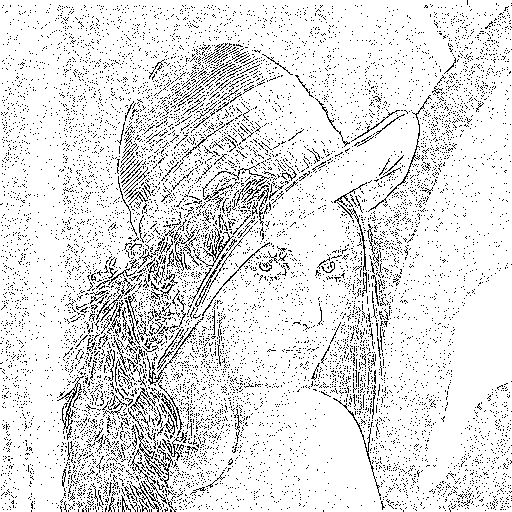

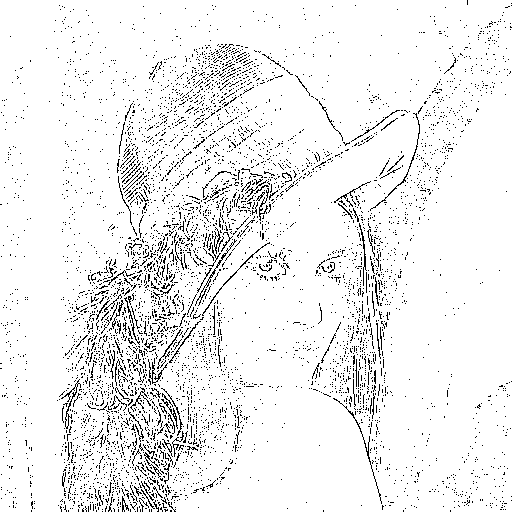

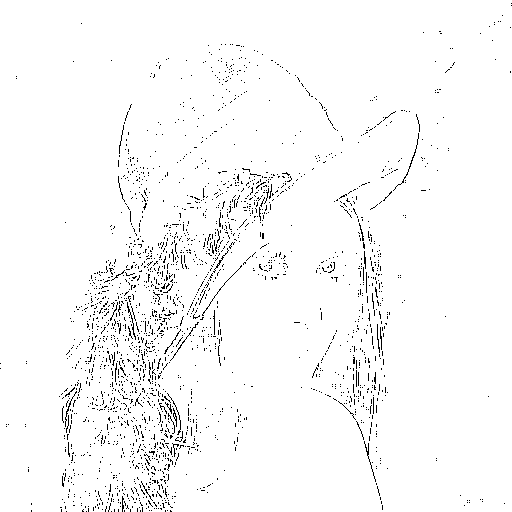

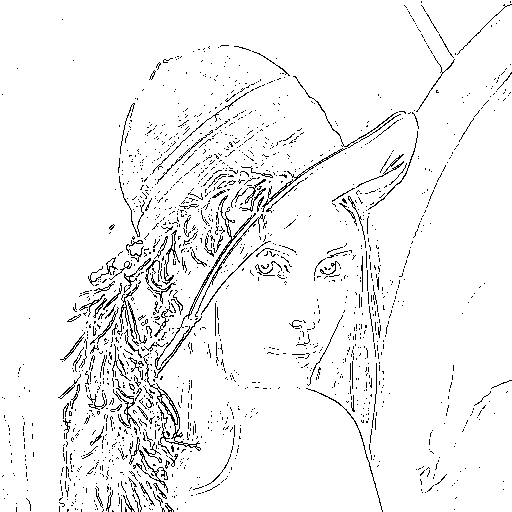

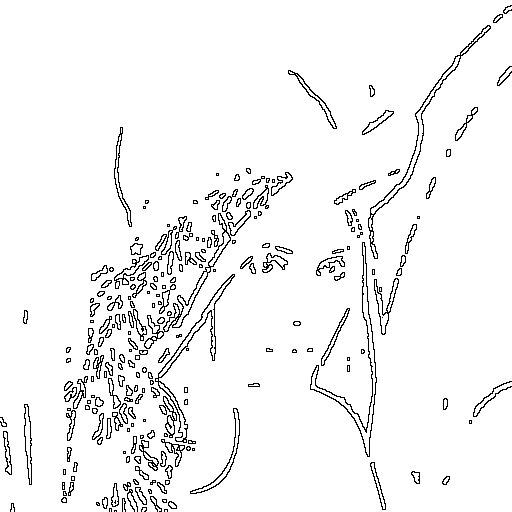

In [17]:
result = zero_crossing(Laplace_Mask1(lena_gray, 15))
cv2_imshow(result)
#cv2.imwrite("Laplace_Mask1_15.bmp", result)
result = zero_crossing(Laplace_Mask2(lena_gray, 15))
cv2_imshow(result)
#cv2.imwrite("Laplace_Mask2_15.bmp", result)
result = zero_crossing(Minimum_variance_Laplacian(lena_gray, 20))
cv2_imshow(result)
#cv2.imwrite("Minimum_variance_Laplacian_20.bmp", result)
result = zero_crossing(Laplacian_of_Gaussian(lena_gray, 3000))
cv2_imshow(result)
#cv2.imwrite("Laplacian_of_Gaussian_3000.bmp", result)
result = zero_crossing(Difference_of_Gaussian(lena_gray, 1))
cv2_imshow(result)
#cv2.imwrite("Difference_of_Gaussian_1.bmp", result)